# Project 1. Game sales data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import re
import wikipediaapi
import math
from statistics import mean
from ing_theme_matplotlib import mpl_style

In [3]:
#options

pd.set_option('display.max_rows', 50);
# set font

plt.rc("font", family = "Malgun Gothic");
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='darkgrid');

mpl_style(dark=False);

option.
1. kaggle 에서 새로운 데이터파일을 가져와 하나로 합친다??
2. 데이터가 항상 풍성할 수는 없다. 제한적인 상황에서 최대한의 아웃풋을 뽑아내본다.

In [4]:
# load data
# df_vgame = pd.read_csv('vgames2.csv');
# df_vgame.head()

In [5]:
# Check missing values
# df_vgame.info()

Unnamed 를 index로 수정  
Year 항목에 결측치 다수, 타입 int로 수정  
Genre 항목 결측치 다수  
Publisher 항목 결측치 다수  
Sales 항목들 numeric 으로 수정  


In [6]:
# vgame_copy = df_vgame.copy();

In [7]:
# Drop Unnamed
# vgame_copy = vgame_copy.drop("Unnamed: 0",axis=1);

In [8]:
# vgame_copy.info()

In [9]:
# year_null = vgame_copy[vgame_copy.Year.isnull()];
# year_null.shape 

In [10]:
# wikipedia 크롤링 해 결측치 채우기

# import wiki_crawler
# import importlib
# importlib.reload(wiki_crawler)

In [11]:
# 모듈 초기화
# wc = wiki_crawler.WikiCrawler();
# 크롤링
# df_result = wc.fill_all(year_null);
# df_result.head()


In [12]:
# 크롤링 한 데이터 합치기

# result_copy = df_result.copy();
# result_copy
# vgame_copy['Year'] = vgame_copy['Year'].astype('str');
# for index in result_copy.index:
#     vgame_copy.loc[index,['Year','Genre','Publisher']] = result_copy.loc[index,['Year','Genre','Publisher']];

# vgame_copy.iloc[31]

In [13]:
# 새로운 파일 생성
# vgame_copy.to_csv('vgames_made_up.csv');

In [14]:
# 결측치 채운 데이터 셋 새로 로드
# df_vgame = pd.read_csv('vgames_0.csv');
# df_vgame.head()

In [15]:
# Drop Unnamed
# vgame_copy = df_vgame.drop("Unnamed: 0",axis=1);
# vgame_copy.head()

In [16]:
# 이외의 결측치는 제거
# vgame_copy = vgame_copy.dropna();
# vgame_copy.shape

In [17]:
# 이상치 탐색

# df_nulls = vgame_copy[vgame_copy.Year.isnull() | vgame_copy.Genre.isnull() |vgame_copy.Publisher.isnull()];
# index = vgame_copy[vgame_copy.Name.duplicated()].index
# vgame_copy.loc[index].sort_values('Name')

# vgame_copy.Year.value_counts()

In [18]:
# Remove .0
# astype int
# vgame_0 = vgame_copy.query("Year.str.contains(r'\d{4}')");
# vgame_0.Year = vgame_0.Year.str.replace(r"\.\d","").astype(int);
# vgame_0.info()



In [19]:
# Remove " game"
# vgame_0.Genre = vgame_0.Genre.str.replace(r" game","");

In [20]:
# merge all role playings
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)role).*","RPG");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)rpg).*","RPG");

In [21]:
# merge all simulations
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)simul).*","Simulation");

In [22]:
# merge all shooters
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)shoot).*","Shooter");

In [23]:
# merge all strategies
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)strat).*","Strategy");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)tact).*","Strategy");

In [24]:
# merge all adventures
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)adven).*","Adventure");

In [25]:
# merge all platforms

# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)platform).*","Platform");

In [26]:
# merge all racings
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)rac).*","Racing");

In [27]:
# merge all actions
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)action).*","Action");

In [28]:
# merge others
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)rhythm).*","Rhythm");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)horror).*","Adventure");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)party).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)unknown).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)beat).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)music).*","Rhythm");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)stealth).*","Action");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)vehicul).*","Action");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)board).*","Strategy");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)manage).*","Simulation");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)various).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)tile).*","Puzzle");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)snow).*","Sports");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)hack).*","Role-Playing");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)break).*","Misc");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)fit).*","Sports");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)otome).*","Simulation");
# vgame_0.Genre = vgame_0.Genre.str.replace(r"^.*((?i)slot).*","Misc");

In [29]:
# print = vgame_0.Genre.value_counts();

In [30]:
# Save
# vgame_1 = vgame_0.copy();
# vgame_1.to_csv('vgames_1.csv');

In [31]:
# dataset load
# vgame_1 = pd.read_csv('vgames_1.csv');
# vgame_1.head()

In [32]:
# vgame_1 = vgame_1.drop("Unnamed: 0",axis=1);
# vgame_1.info()

In [33]:
# Unify units
# vgame_1.Other_Sales.value_counts()

In [34]:
# Modulise method that converts numbers
# unit convert method import

# import unit_converter as uc
# import importlib
# importlib.reload(unit_converter);


In [35]:
# convert all sales numbers
# def func(f):
#     return uc.convert_unit(f, base_unit='M',out_type=int);
# vgame_1.NA_Sales = vgame_1.NA_Sales.map(func);
# vgame_1.EU_Sales = vgame_1.EU_Sales.map(func);
# vgame_1.JP_Sales = vgame_1.JP_Sales.map(func);
# vgame_1.Other_Sales = vgame_1.Other_Sales.map(func);

In [36]:
# add total sales
# vgame_1['Total_Sales'] = vgame_1.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1);
# vgame_1.head()

In [37]:
# reset index
#vgame_1 = vgame_1.reset_index(drop=True);

In [38]:
# save
# vgame_2 = vgame_1.copy();
# vgame_2.to_csv('vgames_2.csv');

In [39]:
# dataset load
# vgame_2 = pd.read_csv('vgames_2.csv');
# vgame_2.head()

In [40]:
# vgame_2 = vgame_2.drop("Unnamed: 0",axis=1);

In [41]:
# clasify console, PC, mobile

# def classify_device(df):
#     hhc = ['DS','PSP','GBA','3DS','PSV','GB','WS','GG'];
#     df_copy = df.copy();
#     devices = [];

#     for index, x in enumerate(vgame_2.Platform):
#         if x in hhc:
#             devices.append('HHC');
#         elif x == 'PC':
#             devices.append('PC');
#         else:
#             devices.append('Console');
    
#     if df_copy.shape[0] == len(devices):            
#         df_copy['Device_Type'] = devices;
    
#     return df_copy;


# def classify_company(df):
#     nintendo = ['DS','Wii','GBA','GC','3DS','N64','SNES','WiiU','GB','NES'];
#     sony = ['PS2','PS3','PSP','PS','PSV','PS4'];
#     MS = ['X360','XB','XOne'];
#     sega = ['SAT','DC','GEN','SCD','GG'];
#     atari = ['2600'];
#     SNK = ['NG'];
#     bandai = ['WS'];
#     panasonic = ['3DO'];
#     NEC = ['TG16','PCFX'];
    
#     df_copy = df.copy();
#     company = [];

#     for index, x in enumerate(vgame_2.Platform):
#         if x in nintendo:
#             company.append('Nintendo');
#         elif x in sony:
#             company.append('Sony');
#         elif x in MS:
#             company.append('Microsoft');
#         elif x in sega:
#             company.append('SEGA');
#         elif x in atari:
#             company.append('Atari');
#         elif x in SNK:
#             company.append('SNK');
#         elif x in bandai:
#             company.append('Bandai');
#         elif x in panasonic:
#             company.append('Panasonic');
#         elif x in NEC:
#             company.append('NEC');
#         else:
#             company.append('PC');
    
#     if df_copy.shape[0] == len(company):
#         df_copy['Platform_Company'] = company;
        
#     return df_copy;


In [42]:
# Add device type and company
# vgame_2 = classify_device(vgame_2);
# vgame_2 = classify_company(vgame_2);
# vgame_2.head()

In [43]:
# reorder columns
# columns_order = ['Name','Year','Genre','Publisher','Platform','Platform_Company','Device_Type','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'];
# vgame_2 = vgame_2[columns_order];

In [44]:
# Save
# vgame_3 = vgame_2.copy();
# vgame_3.to_csv('vgames_3.csv');


In [45]:
# dataset load
# vgame_3 = pd.read_csv('vgames_3.csv',index_col=0);
# vgame_3.head()

In [46]:
# trim before 1980 and after 2017
# make up new data set
# vgame_3 = vgame_3[(vgame_3.Year >= 1980) & (vgame_3.Year < 2017)];


In [47]:
# # 1987 adventrue 누구냐?
# temp = vgame_3[(vgame_3.Year == 1987) & (vgame_3.Genre == 'Adventure')];
# temp
# # 젤다였네...ㅋㅋㅋ

# df_copy = vgame_3.copy();
# zelda_idx = df_copy.query("Name.str.contains(r'(?i)zelda')").index;
# for i in zelda_idx:
#     df_copy.loc[i,'Genre'] = 'Adventure'; # 장르 Adventure로 수정

# df_copy.to_csv('vgames_4.csv');


In [48]:
vgame_4 = pd.read_csv('vgames_4.csv',index_col=0);
vgame_4.head()

,Name,Year,Genre,Publisher,Platform,Platform_Company,Device_Type,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,DS,Nintendo,HHC,40000,0,0,0,40000
1,The Munchables,2009,Action,Namco Bandai Games,Wii,Nintendo,Console,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,PSP,Sony,HHC,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,DS,Nintendo,HHC,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,PS3,Sony,Console,120000,90000,0,40000,250000


1. 지역에 따라선호하는 게임 장르가 다를까?

In [49]:
# 북미 판매량 확인

# 전체년도
na_genre = vgame_4[['Genre','NA_Sales']];

# na_genre_sum = na_genre.groupby('Genre').sum().sort_values('NA_Sales',ascending=False);
# na_genre_mean = na_genre.groupby('Genre').mean().sort_values('NA_Sales',ascending=False);
temp = na_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
temp.columns = col_li;

NA_mean = temp.loc[:,'NA_Sales_mean'].sort_values(axis=0,ascending=False);
NA_max = temp.loc[:,'NA_Sales_max'].sort_values(axis=0,ascending=False);
NA_releases = temp.loc[:,'NA_Sales_count'].sort_values(axis=0,ascending=False);


In [50]:
# 유럽 판매량 확인

# 전체년도
# eu_genre = vgame_4[['Genre','EU_Sales']];

# temp = eu_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# temp.columns = col_li;

# EU_mean = temp.loc[:,'EU_Sales_mean'].sort_values(axis=0,ascending=False);
# EU_max = temp.loc[:,'EU_Sales_max'].sort_values(axis=0,ascending=False);
# EU_releases = temp.loc[:,'EU_Sales_count'].sort_values(axis=0,ascending=False);


In [51]:
# 일본 판매량 확인

# 전체년도
# jp_genre = vgame_4[['Genre','JP_Sales']];

# temp = jp_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# temp.columns = col_li;

# JP_mean = temp.loc[:,'JP_Sales_mean'].sort_values(axis=0,ascending=False);
# JP_max = temp.loc[:,'JP_Sales_max'].sort_values(axis=0,ascending=False);
# JP_releases = temp.loc[:,'JP_Sales_count'].sort_values(axis=0,ascending=False);


In [52]:
# 기타지역 판매량 확인

# 전체년도
# other_genre = vgame_4[['Genre','Other_Sales']];

# temp = other_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# temp.columns = col_li;

# Other_mean = temp.loc[:,'Other_Sales_mean'].sort_values(axis=0,ascending=False);
# Other_max = temp.loc[:,'Other_Sales_max'].sort_values(axis=0,ascending=False);
# Other_releases = temp.loc[:,'Other_Sales_count'].sort_values(axis=0,ascending=False);

In [53]:
# 전체 판매량 확인

# 전체년도
# total_genre = vgame_4[['Genre','Total_Sales']];

# temp = total_genre.groupby(['Genre']).agg(['mean', 'max', 'count']);

# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# temp.columns = col_li;

# Total_mean = temp.loc[:,'Total_Sales_mean'].sort_values(axis=0,ascending=False);
# Total_max = temp.loc[:,'Total_Sales_max'].sort_values(axis=0,ascending=False);
# Total_releases = temp.loc[:,'Total_Sales_count'].sort_values(axis=0,ascending=False);

In [54]:
def set_colours(df):
    colours = [];
    for x in df.index:
        if   x == 'Action':     colours.append('tab:blue');
        elif x == 'Sports':     colours.append('tab:orange');
        elif x == 'Misc':       colours.append('tab:gray');
        elif x == 'RPG':        colours.append('tab:green');
        elif x == 'Adventure':  colours.append('tab:purple');
        elif x == 'Shooter':    colours.append('gold');
        elif x == 'Racing':     colours.append('tab:pink');
        elif x == 'Platform':   colours.append('tab:red');
        elif x == 'Simulation': colours.append('tab:olive');
        elif x == 'Fighting':   colours.append('tab:cyan');
        elif x == 'Strategy':   colours.append('slateblue');
        elif x == 'Puzzle':     colours.append('tab:brown'); 
        else : colours.append('white'); 
    return colours;

colour_map = { 
        'Action':     'tab:blue',
        'Sports':     'tab:orange',
        'Misc':       'tab:gray',
        'RPG':        'tab:green',
        'Adventure':  'tab:purple',
        'Shooter':    'gold',
        'Racing':     'tab:pink',
        'Platform':   'tab:red',
        'Simulation': 'tab:olive',
        'Fighting':   'tab:cyan',
        'Strategy':   'slateblue',
        'Puzzle':     'tab:brown'
        };   

c:\Users\TESB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TESB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TESB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TESB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TESB\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: Use

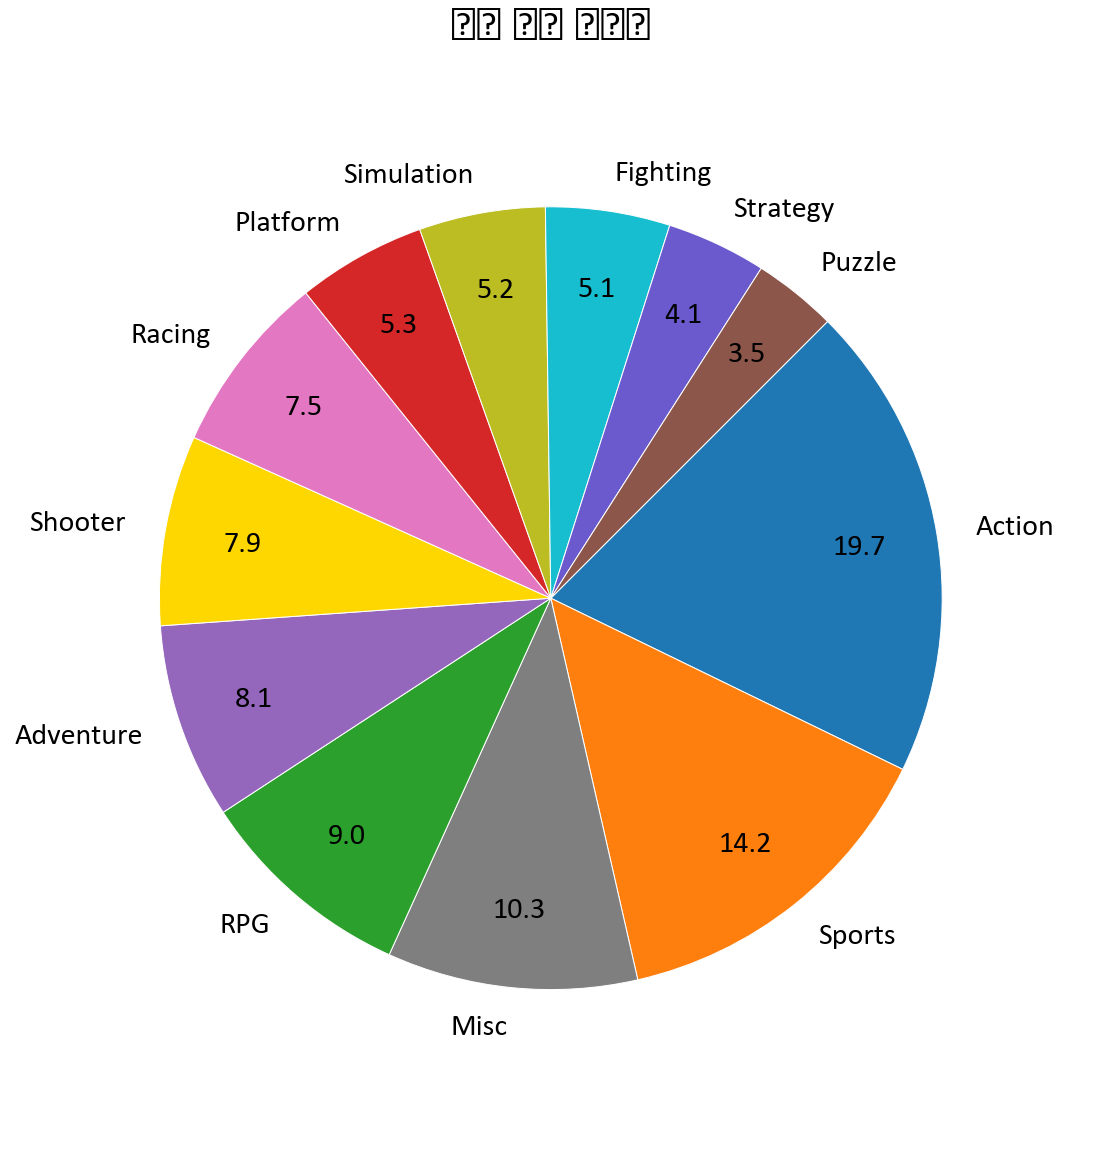

In [55]:
# NA Releases

# plt.style.use('fivethirtyeight');
# plt.style.use('greyscales');


#create pie chart
# sns.color_palette('colorblind');
# colors = sns.color_palette("tab10");
# colors = sns.color_palette("rocket_r");
# colors = sns.color_palette("yellow");
# colors = ['silver', 'gold', 'whitesmoke', 'lightgray'];
# colors = [];

exp = [];
colors = set_colours(NA_releases);

# for i,x in enumerate(NA_releases,1):
    # exp.append((count.shape[0]-i)*0.005);

    

    # PacMan    
    # if 1 <= i <= 1:
    #     colors.append('black');
    #     exp.append(1.2);
    # else : 
    #     colors.append('gold');
    #     exp.append(0);
        
    # exp.append((count.shape[0]-i)*-0.05);
    # exp.append(i*0.08);
    # exp.append((i%2)*-1.9);
    # exp.append(0);

plt.figure(figsize=(20,20));
# plt.title('NA game releases',fontdict={'fontsize' : 50});
plt.title('북미 게임 출시량',fontdict={'fontsize' : 50});

plt.pie(x=NA_releases.values,
        labels=NA_releases.index,
        autopct='%.1f',
        textprops={'fontsize': 30},
        labeldistance=1.1,
        center=(0,0),
        radius=0.9,
        startangle=45,
        counterclock=False,
        pctdistance=0.8,
        #explode=exp,
        #colors=colors
        colors = NA_releases.index.map(colour_map)
        );

# plt.savefig('myfigure.png', dpi=300);
plt.show()


In [56]:
# gn_loc = vgame_4[['Genre','NA_Sales']];
# temp = gn_loc.groupby(['Genre']).agg(['mean', 'max', 'count']);
# print(temp.columns);
# col_li = list(map(lambda x : '_'.join(x[:]), temp.columns));
# print(col_li);
# temp.columns = ['mean','max','count'];
# temp.head()

In [57]:
vgame_aft1995 = vgame_4[(vgame_4.Year >= 1995)];
vgame_aft2000 = vgame_4[(vgame_4.Year >= 2000)];
vgame_aft2000.head()

,Name,Year,Genre,Publisher,Platform,Platform_Company,Device_Type,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,2008,Action,Destineer,DS,Nintendo,HHC,40000,0,0,0,40000
1,The Munchables,2009,Action,Namco Bandai Games,Wii,Nintendo,Console,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010,Adventure,Alchemist,PSP,Sony,HHC,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,2010,Misc,Zoo Games,DS,Nintendo,HHC,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010,Platform,D3Publisher,PS3,Sony,Console,120000,90000,0,40000,250000


In [58]:
def create_barplot_by_genre(data,x,order):
    
    # 전체년도
    gn_loc = data[['Genre',x]];

    group = gn_loc.groupby(['Genre']).agg(['mean', 'max', 'count','median']);
    group.columns = ['Mean','Max','Count','Median'];

    sr_temp = None;
    if order == 'mean':
        sr_temp = group.loc[:,'Mean'].sort_values(axis=0,ascending=False);
    elif order == 'max':
        sr_temp = group.loc[:,'Max'].sort_values(axis=0,ascending=False);
    elif order == 'count':
        sr_temp = group.loc[:,'Count'].sort_values(axis=0,ascending=False);
    elif order == 'median':
        sr_temp = group.loc[:,'Median'].sort_values(axis=0,ascending=False);
    
    df_temp = pd.DataFrame(sr_temp);

    plt.close('all');
    plt.figure(figsize=(10,5));

    # set color
    colours = sr_temp.index.map(colour_map);

    #create barplot chart
    sns.barplot(data=data,
                y='Genre',
                x=x,
                estimator=mean,
                palette=colours, 
                order=df_temp.index,
                ci=0,
                );

    # plt.title('북미지역 장르별 평균 판매량',fontdict={'fontsize' : 50});
    title = str(x + '_' + order);
    plt.title(title,fontdict={'fontsize' : 50});

    # set fontsize
    # sns.set(font_scale = 2);
    plt.rc('xtick', labelsize=15); 
    plt.rc('ytick', labelsize=15);
    plt.tick_params(labelleft=False, left=False);

    # set xtick
    xlim = sr_temp.max();
    headroom = xlim * 0.2;
    plt.xlim(0,xlim + headroom);

    # put comma
    current_values = plt.gca().get_xticks();
    plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);

    # annotation
    y_offset = 0.17;
    x_offset = -70000;
    for i ,values in enumerate(zip(sr_temp.items())):
        plt.text(x=values[0][1] + 2000, y=i + y_offset,s=values[0][0],fontdict={'fontsize': 16});
        # plt.text(x=values[0][1] + x_offset, y=i + y_offset,s=int(values[0][1]));

    plt.savefig(f'{title}.png', dpi=300);    
    plt.show()

C:\Users\TESB\AppData\Local\Temp\ipykernel_16208\1217339481.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


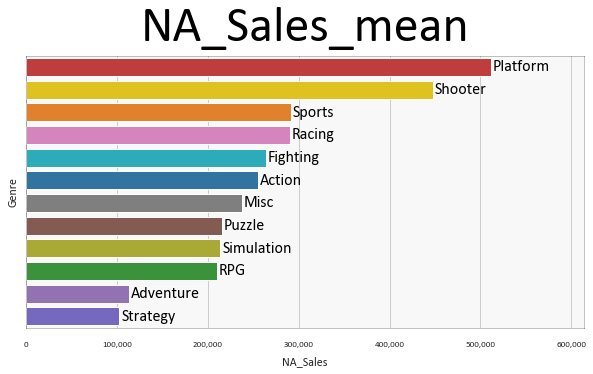

In [59]:
# NA Sales mean
create_barplot_by_genre(vgame_4,x='NA_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_16208\1217339481.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


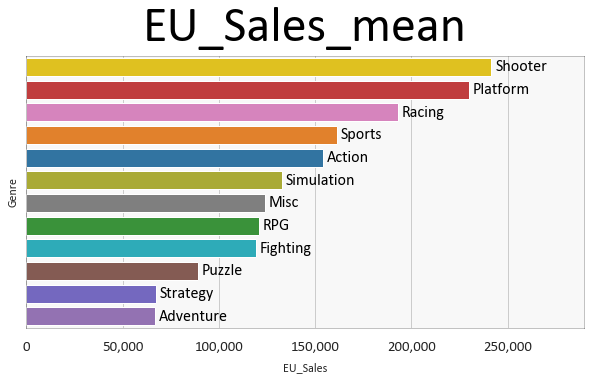

In [60]:
# EU Sales mean
create_barplot_by_genre(vgame_4,x='EU_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_16208\1217339481.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


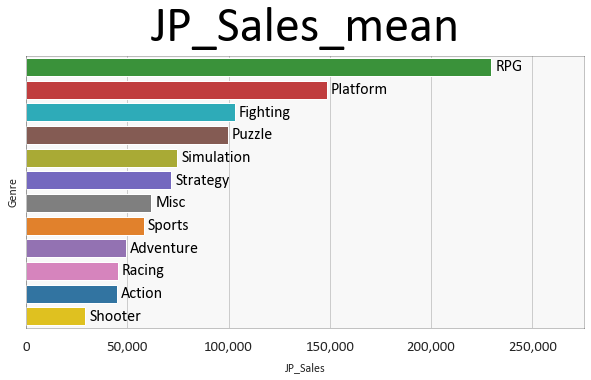

In [61]:
# JP Sales mean
create_barplot_by_genre(vgame_4,x='JP_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_16208\1217339481.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


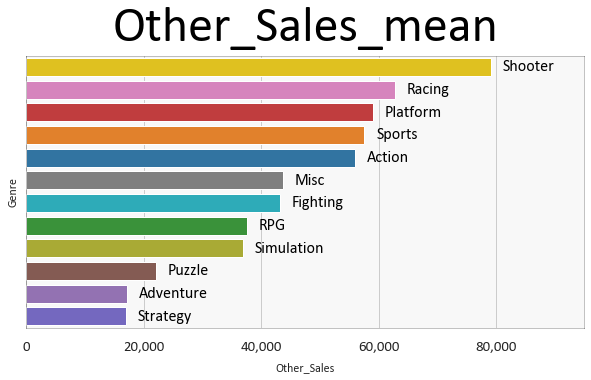

In [62]:
# Other Sales mean
create_barplot_by_genre(vgame_4,x='Other_Sales',order='mean');

C:\Users\TESB\AppData\Local\Temp\ipykernel_16208\1217339481.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([format(int(x),',') for x in current_values]);


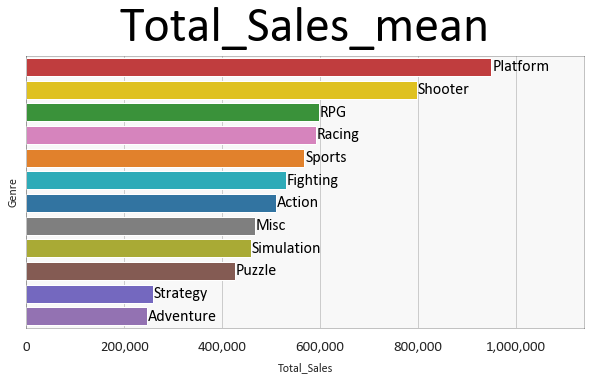

In [63]:
# Total Sales mean
create_barplot_by_genre(vgame_4,x='Total_Sales',order='mean');

In [64]:
gn_total = vgame_aft1995[['Genre','Year','Total_Sales']];

In [65]:

pivot = pd.DataFrame.pivot_table(gn_total,index='Genre',columns='Year',values='Total_Sales', aggfunc = 'mean');
pivot_T = pivot;
# print(pivot.head());

#=============================================================================
# # 빈도를 비율로 변환 (문항별)
# df_freq = df_freq.div(df_freq.sum(axis=1), axis=0)*100
sales_ratio_T = np.round(pivot_T.div(pivot.sum(axis=1), axis=0) * 100, 2);
sales_ratio = (np.round(pivot.div(pivot.sum(axis=0), axis=1) * 100, 2)).T;
sales_ratio.head(5)


# # columns 순서 정렬 (응답 1,2,3,4,5 순으로)
# df_freq = df_freq.reindex(sorted(df_freq.columns), axis=1)
# df_freq

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1995,8.74,1.07,10.16,5.67,25.08,4.38,11.62,9.91,2.46,5.82,5.38,9.71
1996,10.71,2.18,6.25,4.82,20.96,4.16,16.33,14.01,3.12,9.06,3.54,4.86
1997,11.75,4.44,5.28,5.93,15.08,5.25,11.88,11.10,10.28,6.35,8.06,4.60
1998,8.79,8.24,9.18,6.70,14.32,5.80,12.84,6.75,5.06,10.56,7.23,4.52
1999,8.17,5.00,6.88,9.59,13.33,2.58,17.03,8.76,8.82,6.32,5.62,7.90


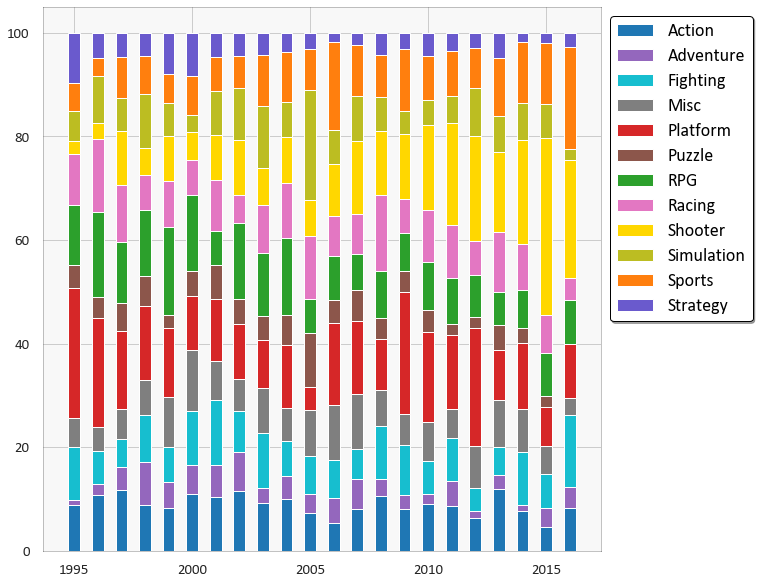

In [66]:
# sales_ratio.plot(kind="bar", stacked=True, colormap='RdBu')
# colours = data.columns.map(colour_map);
# print(colours);
def create_stacked_bar(data):

    plt.close('all');
    plt.figure(figsize=(10, 10));

    # fig, ax = plt.subplots();
    # fig.set(figsize=(20,7));

    # print(sales_ratio['Action'].index.array);
    test = np.zeros(4);
    bottoms = np.zeros(len(data.index));
    # print(len(bottoms));

    for i, col in enumerate(data.columns):

        plt.bar(
            x=data.index,
            height=data[col],
            color=colour_map[col],
            bottom=bottoms,
            label=col,
            width=0.5
        );
        bottoms += np.nan_to_num(data[col].values);
        
    # plt.xticks(data.index, rotation=40);
    plt.rc('xtick', labelsize=30); 
    plt.rc('ytick', labelsize=30);
    
    plt.legend(
        #loc='center right',
        bbox_to_anchor=(1, 1),
        prop={'size': 18},
        fancybox=True,
        shadow=True
        );
    
    plt.savefig(f'genre_ratio.png', 
                dpi=300,
                bbox_inches='tight',
                pad_inches=1
                );  

create_stacked_bar(sales_ratio);


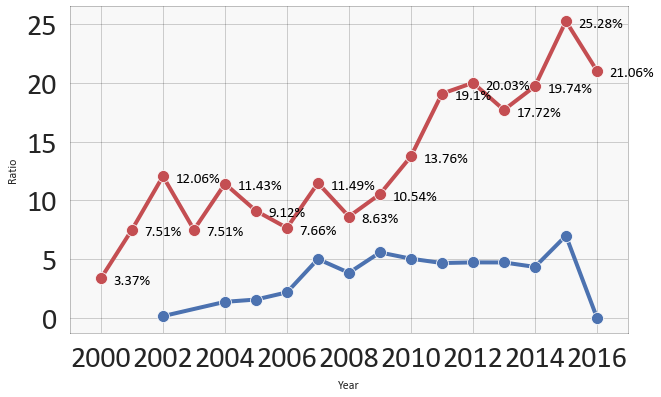

In [67]:
# 전체 판매량 
shooter = vgame_aft2000[vgame_aft2000.Genre == 'Shooter'];
shooter_sum = pd.DataFrame.pivot_table(shooter,index='Genre',columns='Year',values='Total_Sales', aggfunc = 'sum');
shooter_sum = shooter_sum.sum(axis=0).reset_index();
shooter_sum.columns = ['Year','Value'];

cod = vgame_aft2000.query("Name.str.contains(r'(?i)call')");
cod_sum = pd.DataFrame.pivot_table(cod,index='Genre',columns='Year',values='Total_Sales', aggfunc = 'sum');
cod_sum = cod_sum.sum(axis=0).reset_index();
cod_sum.columns = ['Year','Value'];

total_sum = pd.DataFrame.pivot_table(vgame_aft2000,index='Genre',columns='Year',values='Total_Sales', aggfunc = 'sum');
total_sum = total_sum.sum(axis=0).reset_index();
total_sum.columns = ['Year','Value'];

shooter_sum['Ratio'] = (shooter_sum.Value.div(total_sum.Value)) * 100;
cod_sum['Ratio'] = (cod_sum.Value.div(total_sum.Value)) * 100;
# shooter_ratio.Value = shooter_ratio[0].__mul__(100);
# print(shooter_ratio);
plt.close('all');
plt.figure(figsize=(10,6));
sns.lineplot(data=cod_sum,
             x='Year',
             y='Ratio',
             marker='o',
             linewidth = 4,
             markersize = 12,
             color='b',
             palette='viridis'
             );

sns.lineplot(data=shooter_sum,
             x='Year',
             y='Ratio',
             marker='o',
             linewidth = 4,
             markersize = 12,
             color='r',
             palette='viridis'
             );

plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.xlim([1999,2017]);
for x in shooter_sum.iterrows():
    plt.text(
            x=x[1][0]+ 0.4,
            y=x[1][2] - 0.5,
            s=str(f"{np.round(x[1][2],2)}%"),
            fontdict={'fontsize': 15}
            );

plt.savefig(f'shooter_rate.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=1
            )

In [68]:
# cumulative call of duty
cod_cum = [];
cum = 0;
for x in cod_sum.iterrows():
    cum += x[1][1];
    cod_cum.append(cum);

cod_sum['Cum'] = cod_cum;
cod_cum

[290000.0,
 4790000.0,
 11040000.0,
 18890000.0,
 39460000.0,
 57070000.0,
 85830000.0,
 116920000.0,
 148970000.0,
 180400000.0,
 207770000.0,
 230040000.0,
 255339999.0,
 255369999.0]

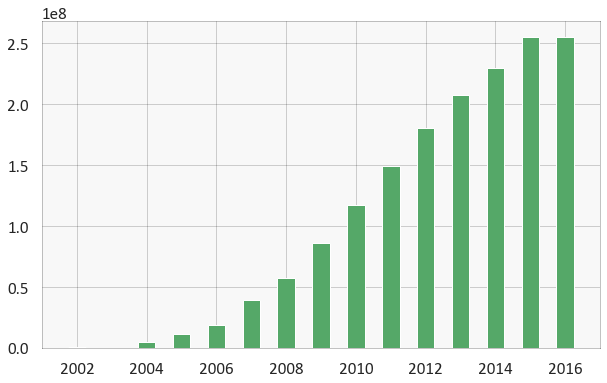

In [69]:
from re import M


plt.close('all');
plt.figure(figsize=(10,6));
# sns.lineplot(data=cod_sum,
#              x='Year',
#              y='Cum',
#              marker='o',
#              linewidth = 4,
#              markersize = 12,
#              color='g',
#              palette='viridis'
#              );

plt.bar(
    x=cod_sum.Year,
    height=cod_sum.Cum,
    color='g',
    # bottom=bottoms,
    # label=col,
    width=0.5
);

plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.xlim([2001,2017]);
# for x in cod_sum.iterrows():
#     plt.text(
#             x=x[1][0],
#             y=x[1][3],
#             s=str(f"{format(int(x[1][3]),',')}"),
#             fontdict={'fontsize': 15},
#             # rotation=-90
#             );

plt.savefig(f'cod_cum.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=1
            )

In [70]:
type_total = vgame_aft1995[['Device_Type','Year','Total_Sales']];
type_total = pd.DataFrame.pivot_table(type_total,index='Device_Type',columns='Year',values='Total_Sales', aggfunc = 'sum');
type_total.head()

# type_sales_ratio_T = np.round(pivot_T.div(pivot.sum(axis=1), axis=0) * 100, 2);
type_sales_ratio = (np.round(type_total.div(type_total.sum(axis=0), axis=1) * 100, 2)).T;
type_sales_ratio.head(5)

Device_Type,Console,HHC,PC
Year,,,
1995,90.99,4.15,4.86
1996,76.31,18.32,5.37
1997,90.75,3.66,5.58
1998,88.17,10.55,1.29
1999,82.77,15.31,1.91


In [71]:
def create_ratio_chart(data):
    # print(colours);
    plt.close('all')
    plt.figure(figsize=(10, 6))
    # fig, ax = plt.subplots();
    # fig.set(figsize=(20,7));

    # print(sales_ratio['Action'].index.array);
    test = np.zeros(4)
    bottoms = np.zeros(len(data.index))
    #print(len(bottoms));
    linewidth = 4;
    markersize = 10;
    
    for i, col in enumerate(data.columns):

        # plt.bar(
        # x=data.index,
        # height=data[col],
        # # color=colour_map[col],
        # bottom=bottoms,
        # label=col
        # );

        ax = sns.lineplot(data=data,
                          x='Year',
                          y=data[col],
                          marker='o',
                          linewidth=linewidth,
                          markersize=markersize,
                          #color='r',
                          palette='viridis',
                          label=col
                          )

        bottoms += np.nan_to_num(data[col].values)

    ax = sns.lineplot(data=data,
                      x='Year',
                      y=bottoms,
                      marker='o',
                      linewidth=linewidth,
                      markersize=markersize,
                      color='r',
                      palette='viridis',
                      label='Total'
                      )

    # handle.append(ax)

    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    # plt.xticks(data.index);
    plt.legend(
        #loc='center right',
        bbox_to_anchor=(0.93, 1.12),
        ncol=4,
        prop={'size': 17},
        fancybox=True,
        shadow=True)
    
    print(bottoms);

    plt.savefig(f'Sales_type.png',
                dpi=300,
                bbox_inches='tight',
                pad_inches=1
                )


[8.66800000e+07 1.97059999e+08 2.01929998e+08 2.55089998e+08
 2.51189999e+08 2.02089998e+08 3.30289995e+08 4.01179998e+08
 3.61740000e+08 4.10549998e+08 4.59049998e+08 5.16180000e+08
 6.17049999e+08 6.86449997e+08 6.65379999e+08 5.80039999e+08
 5.13219998e+08 3.61469997e+08 3.54049999e+08 3.34319997e+08
 2.61579998e+08 6.63500000e+07]


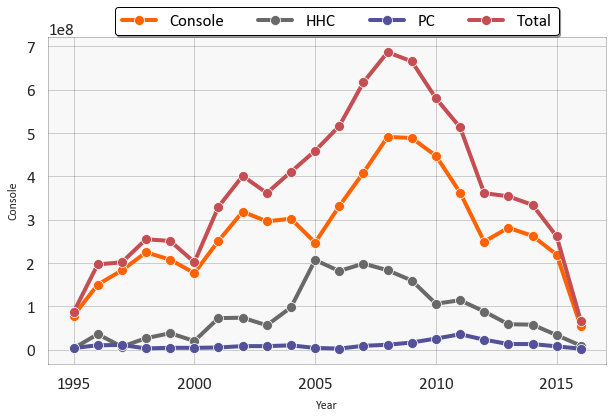

In [72]:
create_ratio_chart(type_total.T);

In [73]:
def create_ratio_chart(data):
    # print(colours);
    plt.close('all')
    plt.figure(figsize=(10, 6))
    # fig, ax = plt.subplots();
    # fig.set(figsize=(20,7));

    # print(sales_ratio['Action'].index.array);
    test = np.zeros(4)
    bottoms = np.zeros(len(data.index))
    #print(len(bottoms));
    linewidth = 4;
    markersize = 10;
    ax = sns.lineplot(data=data,
                          x='Year',
                          y=data[col],
                          marker='o',
                          linewidth=linewidth,
                          markersize=markersize,
                          #color='r',
                          palette='viridis',
                          label=col
                          )

    bottoms += np.nan_to_num(data[col].values)

    ax = sns.lineplot(data=data,
                      x='Year',
                      y=bottoms,
                      marker='o',
                      linewidth=linewidth,
                      markersize=markersize,
                      color='r',
                      palette='viridis',
                      label='Total'
                      )

    # handle.append(ax)

    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    # plt.xticks(data.index);
    plt.legend(
        #loc='center right',
        bbox_to_anchor=(0.93, 1.12),
        ncol=4,
        prop={'size': 17},
        fancybox=True,
        shadow=True)
    
    print(bottoms);

    plt.savefig(f'Sales_type.png',
                dpi=300,
                bbox_inches='tight',
                pad_inches=1
                )


In [74]:
company_total = vgame_4[['Platform_Company','Year','Total_Sales']];
company_total = pd.DataFrame.pivot_table(company_total,index='Platform_Company',columns='Year',values='Total_Sales', aggfunc = 'mean');
# company_total.head()

# type_sales_ratio_T = np.round(pivot_T.div(pivot.sum(axis=1), axis=0) * 100, 2);
company_sales_ratio = (np.round(company_total.div(company_total.sum(axis=0), axis=1) * 100, 2)).T;
company_sales_ratio.head(5)

create_ratio_chart(company_sales_ratio);

NameError: name 'col' is not defined

<Figure size 720x432 with 0 Axes>

37


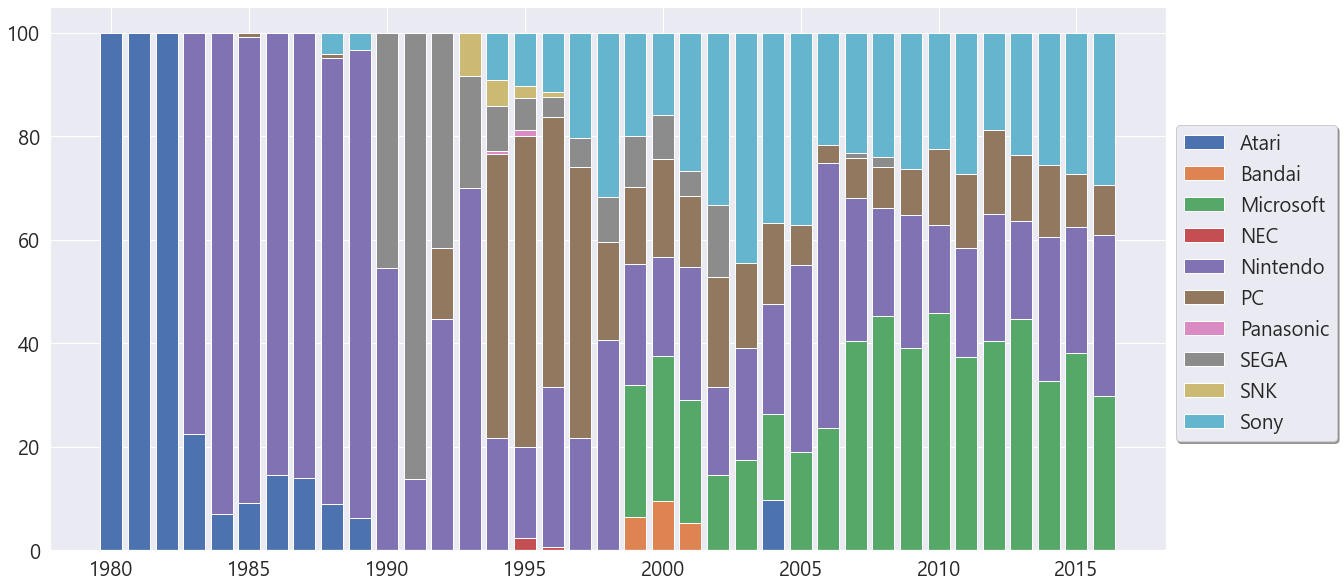

In [ ]:
# print(colours);
plt.close('all');
plt.figure(figsize=(20,10));
# fig, ax = plt.subplots();
# fig.set(figsize=(20,7));

# print(sales_ratio['Action'].index.array);
test = np.zeros(4);
bottoms = np.zeros(len(company_sales_ratio.index));
print(len(bottoms));
for i, col in enumerate(company_sales_ratio.columns):

    plt.bar(
    x=company_sales_ratio.index,
    height=company_sales_ratio[col],
    # color=colour_map[col],
    bottom=bottoms,
    label=col
    );   
    
    bottoms += np.nan_to_num(company_sales_ratio[col].values);

# plt.xticks(company_sales_ratio.index);
plt.legend(
        #loc='center right', 
        bbox_to_anchor=(1, 0.8),
        #ncol = 3,
        prop={'size': 20},
        fancybox=True, 
        shadow=True);

In [75]:
sht_aft2000 = vgame_4[(vgame_4.Year >= 2000) & (vgame_4.Genre == 'Shooter')];
sht_aft2000 = sht_aft2000.sort_values('Total_Sales',ascending=False);
sht_aft2000.sum()

Name                Call of Duty: Modern Warfare 3Call of Duty: Bl...
Year                                                          2242600
Genre               ShooterShooterShooterShooterShooterShooterShoo...
Publisher           ActivisionActivisionActivisionActivisionActivi...
Platform            X360X360PS4PS3X360X360PS3PS3X360PS3X360X360X36...
Platform_Company    MicrosoftMicrosoftSonySonyMicrosoftMicrosoftSo...
Device_Type         ConsoleConsoleConsoleConsoleConsoleConsoleCons...
NA_Sales                                                    484679999
EU_Sales                                                    289179998
JP_Sales                                                     22620000
Other_Sales                                                  98340000
Total_Sales                                                 894819997
dtype: object

In [77]:
cod = sht_aft2000.query("Name.str.contains(r'(?i)call')");
cod.sum()

Name                Call of Duty: Modern Warfare 3Call of Duty: Bl...
Year                                                           140689
Genre               ShooterShooterShooterShooterShooterShooterShoo...
Publisher           ActivisionActivisionActivisionActivisionActivi...
Platform            X360X360PS4PS3X360X360PS3PS3PS3X360PS3X360PS4X...
Platform_Company    MicrosoftMicrosoftSonySonyMicrosoftMicrosoftSo...
Device_Type         ConsoleConsoleConsoleConsoleConsoleConsoleCons...
NA_Sales                                                    132080000
EU_Sales                                                     85599999
JP_Sales                                                      4150000
Other_Sales                                                  30490000
Total_Sales                                                 252319999
dtype: object

In [78]:
halo = sht_aft2000.query("Name.str.contains(r'(?i)halo')");
halo.sum()

Name                Halo 3Halo: ReachHalo 4Halo 2Halo: Combat Evol...
Year                                                            26103
Genre               ShooterShooterShooterShooterShooterShooterShoo...
Publisher           Microsoft Game StudiosMicrosoft Game StudiosMi...
Platform                     X360X360X360XBXBX360XOneXOneX360XBXBPCPC
Platform_Company    MicrosoftMicrosoftMicrosoftMicrosoftMicrosoftM...
Device_Type         ConsoleConsoleConsoleConsoleConsoleConsoleCons...
NA_Sales                                                     44420000
EU_Sales                                                     14510000
JP_Sales                                                       540000
Other_Sales                                                   4390000
Total_Sales                                                  63860000
dtype: object

In [79]:
sht = vgame_4[vgame_4.Genre == 'Shooter'];
sht.sum()

Name                World of TanksProject Sylpheed: Arc of Decepti...
Year                                                          2573589
Genre               ShooterShooterShooterShooterShooterShooterShoo...
Publisher           Wargaming.netMicrosoft Game StudiosElectronic ...
Platform            PCX360X360X360GBAXOnePSPN64WiiPS2X360PCWiiUPS3...
Platform_Company    PCMicrosoftMicrosoftMicrosoftNintendoMicrosoft...
Device_Type         PCConsoleConsoleConsoleHHCConsoleHHCConsoleCon...
NA_Sales                                                    574279997
EU_Sales                                                    309679997
JP_Sales                                                     37400000
Other_Sales                                                 101500000
Total_Sales                                                1022859994
dtype: object

In [87]:
all_total = 8772589960;
# shooter_total = 1022859994;
total_2000 = 7120989970;
halo_total =63860000;
cod_total = 252319999;
shooter_total = 894819997;
cod_ratio = cod_total / shooter_total;
shooter_ratio = shooter_total / total_2000;
cod_ratio
shooter_ratio_2016 = 0.258;

In [82]:
vgame_aft2000.sum()

Name                Candace Kane's Candy FactoryThe MunchablesOtom...
Year                                                         28815787
Genre               ActionActionAdventureMiscPlatformSportsSimulat...
Publisher           DestineerNamco Bandai GamesAlchemistZoo GamesD...
Platform            DSWiiPSPDSPS3DSPCPSPPS3PS3PSGBAPCDSDSPS3PCPS3P...
Platform_Company    NintendoNintendoSonyNintendoSonyNintendoPCSony...
Device_Type         HHCConsoleHHCHHCConsoleHHCPCHHCConsoleConsoleC...
NA_Sales                                                   3511839984
EU_Sales                                                   2084929991
JP_Sales                                                    792899999
Other_Sales                                                 731319996
Total_Sales                                                7120989970
dtype: object

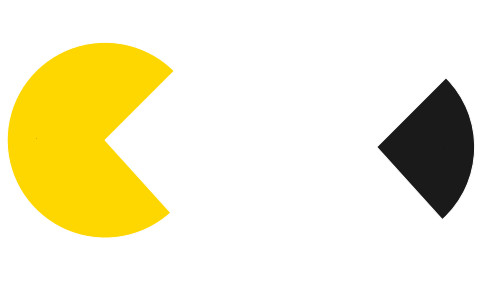

In [91]:
plt.close('all');
plt.figure(figsize=(10,5));
plt.pie(x=[shooter_ratio_2016,1-shooter_ratio_2016],
        labels=['',''],
        autopct='%.1f',
        textprops={'fontsize': 0},
        labeldistance=1.1,
        center=(0,0),
        radius=0.9,
        startangle=45,
        counterclock=False,
        pctdistance=0.7,
        explode=[1.5,1],
        colors=['k','gold']
        #colors = NA_releases.index.map(colour_map)
        );

plt.savefig(f'pac-man_2.png', 
                dpi=300,
                bbox_inches='tight',
                pad_inches=1
                );  

In [ ]:


##======================================================
# gn_total.head(10)

group = gn_total.groupby(['Year', 'Genre']).sum();
group = group.reset_index();
sum = group.groupby('Year').sum();
sum = sum.reset_index();
list_num = [];

for i, row in enumerate(group.values):
    ratio = np.round(row[2] / (sum[sum.Year == row[0]].Total_Sales.iat[0]),4);
    list_num.append(ratio);

print(group.shape);
print(len(list_num));
if group.shape[0] == len(list_num):
    group['Ratio'] = list_num;

group = group[['Year','Genre','Ratio']];
group[group.Year == 2000]


(263, 3)
263


,Year,Genre,Ratio
60,2000,Action,0.1511
61,2000,Adventure,0.0313
62,2000,Fighting,0.1003
63,2000,Misc,0.0769
64,2000,Platform,0.0790
65,2000,Puzzle,0.0190
66,2000,RPG,0.1453
67,2000,Racing,0.1008
68,2000,Shooter,0.0337
69,2000,Simulation,0.0167


In [ ]:
melt = gn_total.melt(id_vars=['Year','Genre']);

In [ ]:
temp = sales_ratio.reset_index();
temp.head()
temp = temp.melt(id_vars='Year',value_vars=['Action','Adventure','Fighting','Misc','Platform','Puzzle','RPG','Racing','Shooter','Simulation','Sports','Strategy']);
temp.head()


,Year,Genre,value
0,1995,Action,8.74
1,1996,Action,10.71
2,1997,Action,11.75
3,1998,Action,8.79
4,1999,Action,8.17


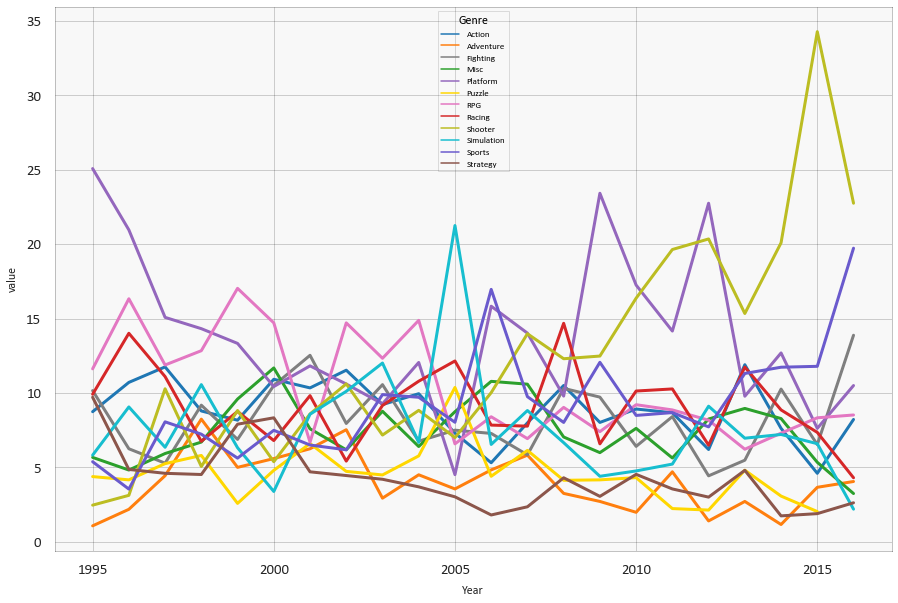

In [ ]:
plt.close('all');
plt.figure(figsize=(15,10));
sns.lineplot(
    data=temp,
    x='Year',
    y='value',
    #y=group.values,
    hue='Genre',
    palette=colors,
    linewidth = 3
);

In [ ]:
temp = sales_ratio.reset_index();
temp.head()
temp = temp.melt(id_vars='Year',value_vars=['Action','Adventure','Fighting','Misc','Platform','Puzzle','RPG','Racing','Shooter','Simulation','Sports','Strategy']);
temp.head()


,Year,Genre,value
0,1995,Action,8.74
1,1996,Action,10.71
2,1997,Action,11.75
3,1998,Action,8.79
4,1999,Action,8.17
